In [11]:
# Cell 1: install dependencies
!pip install googletrans==4.0.0-rc1 nest_asyncio


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/55.1 kB ? eta -:--:--
   ---------------------------------------- 55.1/55.1 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.4 kB ? eta -:--:--
   ---------------------------------------- 133.4/133.4 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ---------------------------------------- 42.6/42.6 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/58.8 kB ? eta -:--:--
   ---------------------------------------- 58.8/58.8 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/65.0 kB ? eta -:--:--
   ---------------------------------------- 65.0/65.0 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB 8.6 MB/s eta 0:00:01
   -------

In [13]:
# Cell 2: setup imports & patch the event‑loop
import nest_asyncio
nest_asyncio.apply()

import json
import asyncio
from googletrans import Translator


In [15]:
# Cell 3: define your async translator + runner

async def translate_vi_to_en(text: str, translator: Translator) -> str:
    if not text.strip():
        return text
    # googletrans returns a coroutine in this version
    result = await translator.translate(text, src='vi', dest='en')
    return result.text

async def translate_json(input_path: str, output_path: str):
    translator = Translator()
    # load
    with open(input_path, 'r', encoding='utf-8') as f:
        posts = json.load(f)
    # translate
    for post in posts:
        post_text = post.get('post_text', '')
        post['post_text'] = await translate_vi_to_en(post_text, translator)
        comments = post.get('comments', [])
        new_comments = []
        for c in comments:
            if '\t' in c:
                user, body = c.split('\t', 1)
                body_en = await translate_vi_to_en(body, translator)
                new_comments.append(f"{user}\t{body_en}")
            else:
                new_comments.append(await translate_vi_to_en(c, translator))
        post['comments'] = new_comments
    # write
    with open(output_path, 'w', encoding='utf-8') as f:
        json.dump(posts, f, ensure_ascii=False, indent=2)
    print(f"✅ Wrote translations to {output_path}")

# Cell 4: actually run it
await translate_json('scraped_posts.json', 'translated_scraped_posts.json')


✅ Wrote translations to translated_scraped_posts.json


In [3]:
import json
import re

# 1. Define the list of remittance services you care about
services = [
    "ezyremit",
    "remitly",
    "wise",
    "western union",
    "moneygram",
    "worldremit",
    "xoom",
    "transfast",
    "transferwise",
    "EZY",
    "ezy",
    "Ezy"
]

# 2. Compile a case‑insensitive regex that matches any of these as whole words
pattern = re.compile(r"\b(" + "|".join(re.escape(s) for s in services) + r")\b", re.IGNORECASE)

# 3. Load the translated JSON
with open('translated_scraped_posts.json', 'r', encoding='utf-8') as f:
    posts = json.load(f)

# 4. Scan & print
for idx, post in enumerate(posts, start=1):
    text = post.get('post_text', '')
    if pattern.search(text):
        print(f"[Post #{idx}] {text}")
    
    for c_idx, comment in enumerate(post.get('comments', []), start=1):
        if pattern.search(comment):
            print(f"  ↳ [Comment {idx}.{c_idx}] {comment}")


  ↳ [Comment 2.1] Huy Vo	You use wise to transfer. Quickly good exchange rate and can order Visa cards to use all countries when traveling. Wherever we go, just transfer money back and forth between foreign currencies is done. If you register via your link, you can deposit the first $ 900.
https://word.com/invite/i/quangv28
Wise.com
You’ve been invited to wise - join and get a discount.
You’ve been invited to wise - join and get a discount.
  ↳ [Comment 2.2] Tina Nguyen	Wise, ezyremit, but I see Ezyremit the exchange rate is higher and does not charge if the trip is below 2k ak
  ↳ [Comment 2.3] Nguyễn Trọng Nghĩa	Transfer wise straight
  ↳ [Comment 2.4] Hugh Hg	Free of $ 900 and money within a few hours. Need inbox to help make an account, authenticate the identity and deposit money.
https:// left.com/invite/ihpc/hieuh6
Wise.com
WISE: Online Money Transfers | International Banking Features
WISE: Online Money Transfers | International Banking Features
  ↳ [Comment 2.5] Hoang Hy	Ezyremi

In [13]:
import json
import re

# 1. Define your remittance services
services = [
    "ezyremit",
    "remitly",
    "wise",
    "western union",
    "moneygram",
    "worldremit",
    "xoom",
    "transfast",
    "transferwise",
    "Paypal",
    "Orbit",
    "Orbit remit",
    "Orbitremit",
    "bank",
    "Bank"
]

# 2. Compile a case‑insensitive regex
pattern = re.compile(r"\b(" + "|".join(re.escape(s) for s in services) + r")\b", re.IGNORECASE)

# 3. Load the translated JSON
with open('translated_scraped_posts.json', 'r', encoding='utf-8') as f:
    posts = json.load(f)

# 4. Iterate posts and comments
for idx, post in enumerate(posts, start=1):
    print(f"\n=== Post #{idx} ===\n")
    print(post.get('post_text', '').strip(), "\n")
    print("Comments:")
    
    for comment in post.get('comments', []):
        # Find all unique services mentioned in this comment
        matches = {m.group(1).lower() for m in pattern.finditer(comment)}
        if matches:
            tags = ", ".join(sorted(matches))
        else:
            tags = "none"
        
        # Print the comment with its classification tag
        print(f"- {comment.strip()}  [{tags}]")



=== Post #1 ===

Hi everybody,
I am about to study in New Zealand without knowing which service to transfer money from Vietnam with the fastest and most convenient service. How do people use it, give me some experience.
Thank you very much! 

Comments:
- Quynh Ho	Contact me with SHB  [none]
- Mỹ Oanh	NCB HCM transfers money, tuition. Competitive exchange rate, free money transfer
Zalo 0962194724  [none]
- Nguyễn Kim Ngân	When I came to me, I opened that account, my parents can transfer money to my stk. The safest is switching to Bank.
She is with ACB bank, free money transfer, exchange rate very good. I can contact me to advise me.
0373073751 (Ms Ngan ACB)  [bank]
- Mỹ Hương	MB Bank transfers the active living expenses on the app quickly. Contact Huong 0964235200  [bank]
- Nguyễn Tâm	Bank to Bank. Please contact me  [bank]
- Vy Huynh	The current bank is free of charge and receiving fast during the day
Legal safety
IB or LH 0902994176 I support  [bank]
- Nguyễn Thái Hà	TPBank specializ

In [17]:
import json
import re

# 1. Define your remittance services
services = [
    "ezyremit",
    "remitly",
    "wise",
    "western union",
    "moneygram",
    "worldremit",
    "xoom",
    "transfast",
    "transferwise",
    "Paypal",
    "Orbit",
    "Orbit remit",
    "Orbitremit",
    "bank",
    "Bank"
]

# 2. Compile a case‑insensitive regex
pattern = re.compile(r"\b(" + "|".join(re.escape(s) for s in services) + r")\b", re.IGNORECASE)

# 3. Load the translated JSON
with open('translated_scraped_posts.json', 'r', encoding='utf-8') as f:
    posts = json.load(f)

# 4. Iterate posts and comments
for idx, post in enumerate(posts, start=1):
    print(f"\n=== Post #{idx} ===\n")
    print(post.get('post_text', '').strip(), "\n")
    print("Comments:")
    
    for comment in post.get('comments', []):
        # Find all unique services mentioned in this comment
        matches = {m.group(1).lower() for m in pattern.finditer(comment)}
        if matches:
            tags = ", ".join(sorted(matches))
        else:
            tags = "none"
        
        # Print the comment with its classification tag
        print(f"- {comment.strip()}  [{tags}]")


=== Post #1 ===

Hi everybody,
I am about to study in New Zealand without knowing which service to transfer money from Vietnam with the fastest and most convenient service. How do people use it, give me some experience.
Thank you very much! 

Comments:
- Quynh Ho	Contact me with SHB  [none]
- Mỹ Oanh	NCB HCM transfers money, tuition. Competitive exchange rate, free money transfer
Zalo 0962194724  [none]
- Nguyễn Kim Ngân	When I came to me, I opened that account, my parents can transfer money to my stk. The safest is switching to Bank.
She is with ACB bank, free money transfer, exchange rate very good. I can contact me to advise me.
0373073751 (Ms Ngan ACB)  [bank]
- Mỹ Hương	MB Bank transfers the active living expenses on the app quickly. Contact Huong 0964235200  [bank]
- Nguyễn Tâm	Bank to Bank. Please contact me  [bank]
- Vy Huynh	The current bank is free of charge and receiving fast during the day
Legal safety
IB or LH 0902994176 I support  [bank]
- Nguyễn Thái Hà	TPBank specializ

In [1]:
import json
import re
from collections import defaultdict

# 1. Define your synonym groups
synonym_groups = {
    "ezyremit":      ["ezyremit"],
    "remitly":       ["remitly"],
    "wise":          ["wise", "transferwise"],
    "western_union": ["western union"],
    "moneygram":     ["moneygram"],
    "worldremit":    ["worldremit"],
    "xoom":          ["xoom"],
    "transfast":     ["transfast"],
    "paypal":        ["paypal"],
    "orbitremit":    ["orbit", "orbitremit", "orbit remit"],
    "bank":          ["bank"]
}

# 2. Build a flat map of synonym → canonical key
syn2canon = {}
for canon, syns in synonym_groups.items():
    for s in syns:
        syn2canon[s.lower()] = canon

# 3. Compile a regex that matches any synonym (word boundaries, case‑insensitive)
escaped = [re.escape(s) for syns in synonym_groups.values() for s in syns]
pattern = re.compile(r"\b(" + "|".join(escaped) + r")\b", re.IGNORECASE)

# 4. Load your translated JSON
with open('translated_scraped_posts.json', 'r', encoding='utf-8') as f:
    posts = json.load(f)

# 5. Prepare the result dict
comments_by_service = defaultdict(list)

# 6. Iterate posts & comments, bucket them
for post in posts:
    for comment in post.get('comments', []):
        # find all raw matches (in original case), lower them, dedupe
        raw_matches = {m.group(1).lower() for m in pattern.finditer(comment)}
        for raw in raw_matches:
            canon = syn2canon.get(raw)
            if canon:
                comments_by_service[canon].append(comment)

# 7. (Optional) Convert defaultdict → regular dict
comments_by_service = dict(comments_by_service)

# 8. Inspect
for service, cmts in comments_by_service.items():
    print(f"\n=== {service} ({len(cmts)} comments) ===")
    for c in cmts:
        print(f"- {c}")



=== bank (58 comments) ===
- Nguyễn Kim Ngân	When I came to me, I opened that account, my parents can transfer money to my stk. The safest is switching to Bank.
She is with ACB bank, free money transfer, exchange rate very good. I can contact me to advise me.
0373073751 (Ms Ngan ACB)
- Mỹ Hương	MB Bank transfers the active living expenses on the app quickly. Contact Huong 0964235200
- Nguyễn Tâm	Bank to Bank. Please contact me
- Vy Huynh	The current bank is free of charge and receiving fast during the day
Legal safety
IB or LH 0902994176 I support
- Truc Do	I transferred money at the bank for free, receiving money in 12 hours
Safe, good exchange rate
IB C: 0335776426
- Nguyen ThanhNgoc	The current bank is free of transfer and quick receipt for 24 hours, legal safety, you can refer to a few banks, I can support you IB for me, tks you
- Lý Minh Hoàng	Moving Bank To Bank is the safest, security and transparency.
TPBank is currently free of charge for international money, contacting me qu

In [3]:
# Cell 1: install & download NLTK resources (run once)
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\birad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\birad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
# Cell 2: extend your previous processing
import json
import re
from collections import defaultdict, Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 1. Load comments_by_service (from your previous cell)
#    If you haven't re‑run that, just re‑compute comments_by_service as before...
with open('translated_scraped_posts.json', 'r', encoding='utf-8') as f:
    posts = json.load(f)

# ... (re‑build comments_by_service exactly as before) ...
synonym_groups = {
    "ezyremit":      ["ezyremit"],
    "remitly":       ["remitly"],
    "wise":          ["wise", "transferwise"],
    "western_union": ["western union"],
    "moneygram":     ["moneygram"],
    "worldremit":    ["worldremit"],
    "xoom":          ["xoom"],
    "transfast":     ["transfast"],
    "paypal":        ["paypal"],
    "orbitremit":    ["orbit", "orbitremit", "orbit remit"],
    "bank":          ["bank"]
}

syn2canon = {}
for canon, syns in synonym_groups.items():
    for s in syns:
        syn2canon[s.lower()] = canon

escaped = [re.escape(s) for syns in synonym_groups.values() for s in syns]
pattern = re.compile(r"\b(" + "|".join(escaped) + r")\b", re.IGNORECASE)

comments_by_service = defaultdict(list)
for post in posts:
    for comment in post.get('comments', []):
        raw_matches = {m.group(1).lower() for m in pattern.finditer(comment)}
        for raw in raw_matches:
            canon = syn2canon.get(raw)
            if canon:
                comments_by_service[canon].append(comment)

# 2. Prepare stop‑words set
stop_words = set(stopwords.words('english'))

# 3. For each service, tokenize & count
freq_by_service = {}
for service, cmts in comments_by_service.items():
    counter = Counter()
    for c in cmts:
        # tokenize, lowercase
        tokens = word_tokenize(c)
        for w in tokens:
            w_low = w.lower()
            # keep only alphabetic, not in stop‑words, and length>1
            if w_low.isalpha() and w_low not in stop_words:
                counter[w_low] += 1
    freq_by_service[service] = counter

# 4. Print top 10 words per service
for service, counter in freq_by_service.items():
    print(f"\n=== {service} (top words) ===")
    for word, cnt in counter.most_common(100):
        print(f"{word:15s} {cnt}")



=== bank (top words) ===
bank            76
money           48
transfer        40
free            35
exchange        25
rate            22
good            21
contact         19
ib              13
abroad          10
nguyễn          9
support         9
need            9
account         7
receiving       7
safety          7
msb             7
b               7
vietnam         7
please          6
charge          6
transferred     6
hours           6
international   6
studying        6
side            6
fee             6
safest          5
acb             5
quickly         5
legal           5
nguyen          5
nhung           5
transferring    5
trang           5
ncb             5
kim             4
parents         4
transfers       4
living          4
expenses        4
app             4
current         4
fast            4
safe            4
minh            4
currently       4
hoang           4
giang           4
tuyết           4
hồng            4
new             4
advice          4
pay       

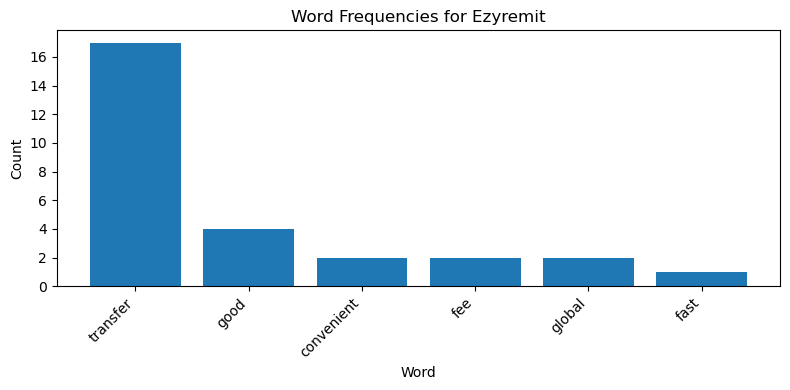

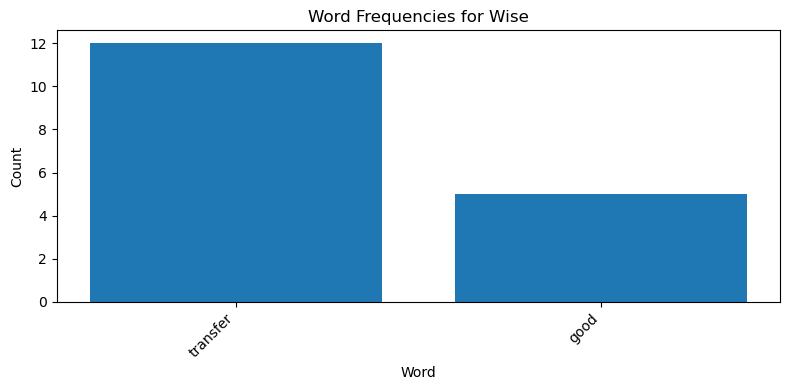

In [13]:
import matplotlib.pyplot as plt

# 1. Manually specify exactly which words you want to include in the plots
include_words = ['fee', 'transfer', 'fast', 'cheap', 'good', 'global', 'convenient']  # ← only these words will be plotted

# 2. Specify which services you want to plot
services_to_plot = ['ezyremit', 'wise']

# 3. Generate bar‑plots
for service in services_to_plot:
    # Get the word frequency Counter for this service
    counter = freq_by_service.get(service, {})

    # Keep only the words in your include list
    filtered = [
        (word, count)
        for word, count in counter.items()
        if word in include_words
    ]
    # Sort by descending frequency
    filtered.sort(key=lambda x: x[1], reverse=True)

    if not filtered:
        print(f"No data to plot for '{service}' — none of your include_words were found.")
        continue

    # Split into two sequences
    words, counts = zip(*filtered)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.bar(words, counts)
    plt.title(f"Word Frequencies for {service.capitalize()}")
    plt.xlabel("Word")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [3]:
# Cell 1: install the sentiment library
!pip install vaderSentiment

# Cell 2: imports & setup
import json, re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import defaultdict

# 1️⃣ Re‑use your synonym groups & build comments_by_service
synonym_groups = {
    "ezyremit":      ["ezyremit"],
    "wise":          ["wise", "transferwise"],
    # … add the rest if you like …
}

# flatten to synonym→canonical
syn2canon = {}
for canon, syns in synonym_groups.items():
    for s in syns:
        syn2canon[s.lower()] = canon

# build a regex matching any synonym
pattern = re.compile(
    r"\b(" + "|".join(re.escape(s) for syns in synonym_groups.values() for s in syns) + r")\b",
    re.IGNORECASE
)

# load translated JSON
with open('translated_scraped_posts.json', 'r', encoding='utf-8') as f:
    posts = json.load(f)

# bucket comments per canonical service
comments_by_service = defaultdict(list)
for post in posts:
    for comment in post.get('comments', []):
        raw = {m.group(1).lower() for m in pattern.finditer(comment)}
        for w in raw:
            canon = syn2canon.get(w)
            if canon:
                comments_by_service[canon].append(comment)

# 2️⃣ initialize VADER
analyzer = SentimentIntensityAnalyzer()

# 3️⃣ classify sentiments
sentiments = {"wise": [], "ezyremit": []}

for service in sentiments:
    for comment in comments_by_service.get(service, []):
        scores = analyzer.polarity_scores(comment)
        comp = scores['compound']
        if comp >= 0.05:
            label = "positive"
        elif comp <= -0.05:
            label = "negative"
        else:
            label = "neutral"
        sentiments[service].append((comment, label))

# Cell 3: inspect results
for service, results in sentiments.items():
    print(f"\n=== {service.capitalize()} ({len(results)} comments) ===")
    for comment, label in results:
        print(f"- [{label:^7}] {comment}")


   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------------------- ------------------- 61.4/126.0 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.1 MB/s eta 0:00:00

=== Wise (20 comments) ===
- [positive] Huy Vo	You use wise to transfer. Quickly good exchange rate and can order Visa cards to use all countries when traveling. Wherever we go, just transfer money back and forth between foreign currencies is done. If you register via your link, you can deposit the first $ 900.
https://word.com/invite/i/quangv28
Wise.com
You’ve been invited to wise - join and get a discount.
You’ve been invited to wise - join and get a discount.
- [positive] Tina Nguyen	Wise, ezyremit, but I see Ezyremit the exchange rate is higher and does not charge if the trip is below 2k ak
- [positive] Nguyễn Trọ

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Services to evaluate
services = ["wise", "ezyremit"]

# Prepare a counter for each
sentiment_counts = {svc: Counter() for svc in services}

# Classify each comment and increment the appropriate bucket
for svc in services:
    for comment in comments_by_service.get(svc, []):
        comp = analyzer.polarity_scores(comment)["compound"]
        if comp >=  0.05:
            sentiment = "positive"
        elif comp <= -0.05:
            sentiment = "negative"
        else:
            sentiment = "neutral"
        sentiment_counts[svc][sentiment] += 1

# Print the results
for svc in services:
    counts = sentiment_counts[svc]
    print(f"{svc.capitalize()}:")
    print(f"  Positive: {counts['positive']}")
    print(f"  Neutral:  {counts['neutral']}")
    print(f"  Negative: {counts['negative']}\n")


Wise:
  Positive: 20
  Neutral:  0
  Negative: 0

Ezyremit:
  Positive: 18
  Neutral:  4
  Negative: 2

